# Importation des données et des librairies

In [79]:
!pip install scikit-learn-extra

import numpy as np
import pandas as pd
from sklearn.cluster import MiniBatchKMeans
from sklearn_extra.cluster import KMedoids
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt



     |████████████████████████████████| 1.7 MB 2.7 MB/s 


In [1]:
!pip install rarfile


import rarfile

#rar_path = rarfile.RarFile("/content/base_de_donnees.rar")

with rarfile.RarFile('basededonnees.rar') as file:
  for i in range (100*25) :
      file.extract(file.namelist()[i])

#Mesure de complexité moyenne par personne

In [82]:
data4G=pd.read_csv('Complexité avec 4G (100x25).txt', sep='\t', header=None)
data8G=pd.read_csv('Complexité avec 8G (100x25).txt', sep='\t', header=None)
data24G=pd.read_csv('Complexité avec 24G (100x25).txt', sep='\t', header=None)

complexite4G_mean =np.mean(data4G, axis=1)
complexite8G_mean =np.mean(data8G, axis=1)
complexite24G_mean =np.mean(data24G, axis=1)

print(complexite8G_mean)




0     28.136324
1     27.027750
2     29.788633
3     29.703408
4     28.822261
        ...    
95    29.971740
96    30.608823
97    30.643195
98    29.211425
99    26.472302
Length: 100, dtype: float64


#Kmeans / KMedoids sur les individus (k=3)

In [100]:
complexite4G_mean=np.array(complexite4G_mean).reshape(-1,1)
complexite8G_mean=np.array(complexite8G_mean).reshape(-1,1)
complexite24G_mean=np.array(complexite24G_mean).reshape(-1,1)

kmeans=MiniBatchKMeans(n_clusters=3)
kmedoids=KMedoids(n_clusters=3)

#GMM 4G
kmeans.fit(complexite4G_mean)
kmedoids.fit(complexite4G_mean)
#labels4G=kmeans.labels_ #seulement pour le kmeans
labels4G=kmedoids.labels_
center_clusters4G=kmedoids.cluster_centers_
print(center_clusters4G)

print(labels4G)
unique4G, counts4G = np.unique(labels4G, return_counts=True)
proportions4G=[counts4G[i] for i in range (3)]
print(proportions4G)

#GMM 8G
kmeans.fit(complexite8G_mean)
kmedoids.fit(complexite8G_mean)

#labels8G=kmeans.labels_
labels8G=kmedoids.labels_
center_clusters8G=kmedoids.cluster_centers_
print(center_clusters8G)


print(labels8G)
unique8G, counts8G = np.unique(labels8G, return_counts=True)
proportions8G=[counts8G[i] for i in range (3)]
print(proportions8G)

#GMM 24G
kmeans.fit(complexite24G_mean)
kmedoids.fit(complexite24G_mean)

#labels24G=kmeans.labels_
labels24G=kmedoids.labels_
center_clusters24G=kmedoids.cluster_centers_
print(center_clusters24G)

print(labels24G)
unique24G, counts24G = np.unique(labels24G, return_counts=True)
proportions24G=[counts24G[i] for i in range (3)]
print(proportions24G)




[[28.46388959]
 [30.22229146]
 [31.77120513]]
[2 1 1 2 1 1 1 0 1 1 2 2 2 1 0 0 0 0 0 1 0 0 0 1 2 2 1 2 0 1 1 1 1 2 0 1 0
 2 2 2 1 2 1 1 2 2 1 0 0 0 1 1 2 2 0 1 2 1 1 0 1 1 0 1 2 0 1 0 0 1 1 1 0 1
 1 2 1 1 0 1 1 2 0 2 1 1 1 2 0 1 1 1 1 1 2 2 2 2 1 0]
[26, 47, 27]
[[29.87926876]
 [28.23133143]
 [26.36172588]]
[1 2 0 0 1 0 1 2 1 1 0 0 0 0 2 2 2 2 2 1 2 2 2 1 0 0 1 0 2 1 1 1 0 0 1 1 2
 0 0 0 1 0 1 1 0 0 0 2 2 2 1 1 0 0 2 0 0 1 1 1 0 1 1 0 0 1 1 1 2 1 0 1 1 1
 1 0 1 0 1 1 1 0 2 0 0 1 1 0 1 1 1 0 0 1 0 0 0 0 0 2]
[40, 41, 19]
[[24.10215774]
 [26.89118134]
 [19.04777908]]
[2 0 1 0 0 1 0 2 1 0 1 1 1 1 0 2 2 0 0 1 2 2 2 0 1 1 2 0 2 1 0 0 1 1 0 0 2
 1 1 1 0 1 0 1 1 1 1 2 2 0 0 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 0 2 0 1 1 0 0
 0 1 0 1 0 0 0 1 2 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 0]
[42, 44, 14]


#Détecter quel label correspond à quel groupe

[28.219740934319972, 30.194385018669664, 31.723254666022427]
[28.219740934319972, 30.194385018669664, 31.723254666022427]
['Simple', 'Moyen', 'Difficile']
[30.010458477007393, 28.192029626008406, 25.022653327539178]
[25.022653327539178, 28.192029626008406, 30.010458477007393]
['Difficile', 'Moyen', 'Simple']
[23.79345909379294, 26.98709209866376, 15.754393044660803]
[15.754393044660803, 23.79345909379294, 26.98709209866376]
['Moyen', 'Difficile', 'Simple']


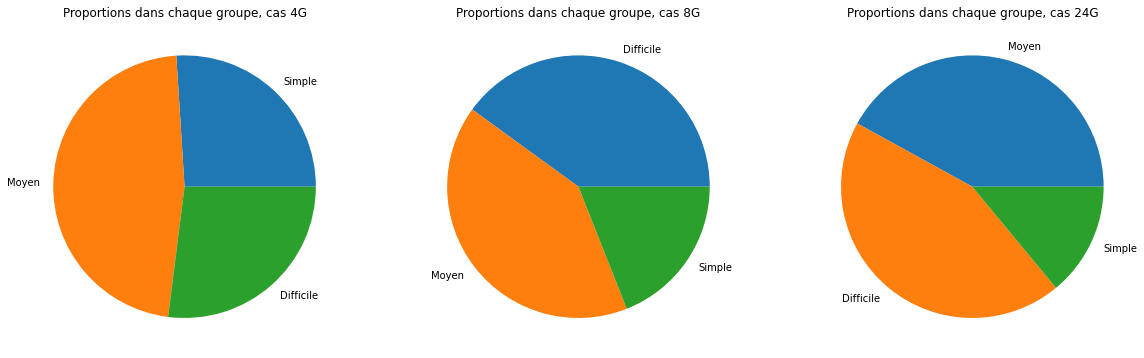

In [101]:
import statistics

#4G 

groupe0_4G=[] # indices des individus du groupe 0
groupe1_4G=[]
groupe2_4G=[]


for i in range (100) :
  if labels4G[i]==0 :
    groupe0_4G.append(complexite4G_mean[i][0])
  elif labels4G[i]==1 :
    groupe1_4G.append(complexite4G_mean[i][0])
  else :
    groupe2_4G.append(complexite4G_mean[i][0])

mean0_4G=statistics.mean(groupe0_4G)
mean1_4G=statistics.mean(groupe1_4G)
mean2_4G=statistics.mean(groupe2_4G)

means_4G=[mean0_4G,mean1_4G,mean2_4G]
means_sorted_4G=[mean0_4G,mean1_4G,mean2_4G]
print(means_4G)
means_sorted_4G.sort(reverse=False)
print(means_sorted_4G)
labels_4G=['' for i in range (3)]

for i in range(3) : 
  if (means_4G[i]==means_sorted_4G[0]) :
    labels_4G[i]='Simple'
  elif means_4G[i]==means_sorted_4G[1] :
    labels_4G[i]='Moyen'
  else :
    labels_4G[i]='Difficile'
print(labels_4G)

#8G

groupe0_8G=[] # indices des individus du groupe 0
groupe1_8G=[]
groupe2_8G=[]


for i in range (100) :
  if labels8G[i]==0 :
    groupe0_8G.append(complexite8G_mean[i][0])
  elif labels8G[i]==1 :
    groupe1_8G.append(complexite8G_mean[i][0])
  else :
    groupe2_8G.append(complexite8G_mean[i][0])

mean0_8G=statistics.mean(groupe0_8G)
mean1_8G=statistics.mean(groupe1_8G)
mean2_8G=statistics.mean(groupe2_8G)

means_8G=[mean0_8G,mean1_8G,mean2_8G]
means_sorted_8G=[mean0_8G,mean1_8G,mean2_8G]
print(means_8G)
means_sorted_8G.sort(reverse=False)
print(means_sorted_8G)
labels_8G=['' for i in range (3)]

for i in range(3) : 
  if (means_8G[i]==means_sorted_8G[0]) :
    labels_8G[i]='Simple'
  elif means_8G[i]==means_sorted_8G[1] :
    labels_8G[i]='Moyen'
  else :
    labels_8G[i]='Difficile'
print(labels_8G)

#24G 

groupe0_24G=[] # indices des individus du groupe 0
groupe1_24G=[]
groupe2_24G=[]


for i in range (100) :
  if labels24G[i]==0 :
    groupe0_24G.append(complexite24G_mean[i][0])
  elif labels24G[i]==1 :
    groupe1_24G.append(complexite24G_mean[i][0])
  else :
    groupe2_24G.append(complexite24G_mean[i][0])

mean0_24G=statistics.mean(groupe0_24G)
mean1_24G=statistics.mean(groupe1_24G)
mean2_24G=statistics.mean(groupe2_24G)

means_24G=[mean0_24G,mean1_24G,mean2_24G]
means_sorted_24G=[mean0_24G,mean1_24G,mean2_24G]
print(means_24G)
means_sorted_24G.sort(reverse=False)
print(means_sorted_24G)
labels_24G=['' for i in range (3)]

for i in range(3) : 
  if (means_24G[i]==means_sorted_24G[0]) :
    labels_24G[i]='Simple'
  elif means_24G[i]==means_sorted_24G[1] :
    labels_24G[i]='Moyen'
  else :
    labels_24G[i]='Difficile'
print(labels_24G)


#Proportion dans chaque groupe 4G 
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(20,10))

ax1.pie(proportions4G,labels=labels_4G)
ax1.set_title("Proportions dans chaque groupe, cas 4G")
ax2.pie(proportions8G,labels=labels_8G)
ax2.set_title("Proportions dans chaque groupe, cas 8G")
ax3.pie(proportions24G,labels=labels_24G)
ax3.set_title("Proportions dans chaque groupe, cas 24G")

plt.show()




#Cluster centers



signature n° 0


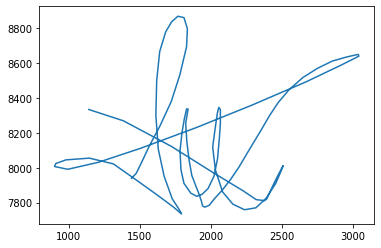

signature n° 1


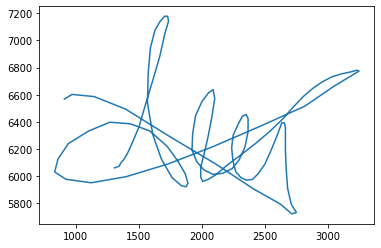

signature n° 2


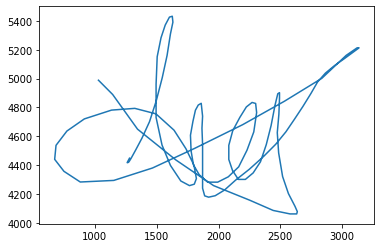

signature n° 3


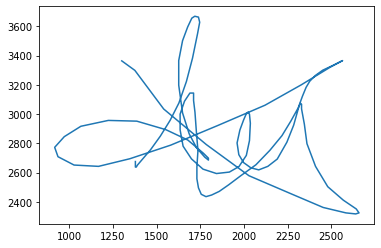

signature n° 4


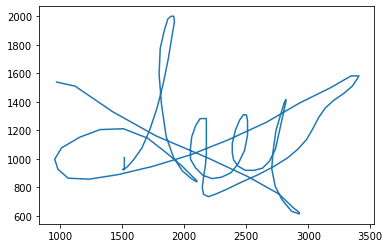

signature n° 0


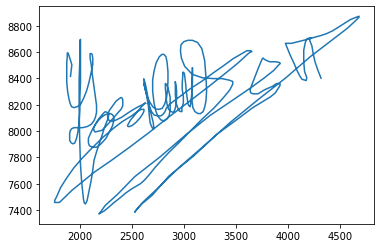

signature n° 1


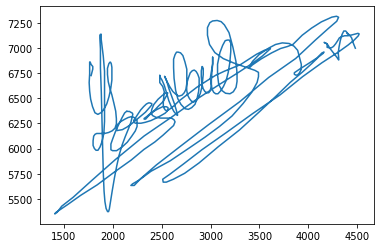

signature n° 2


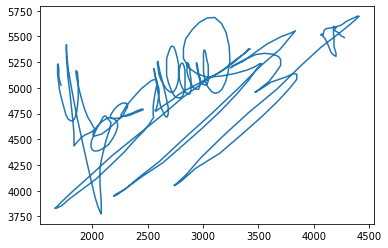

signature n° 3


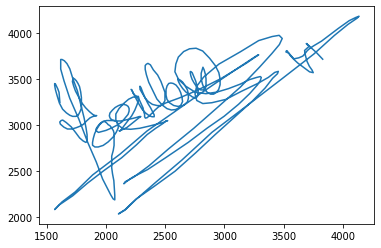

signature n° 4


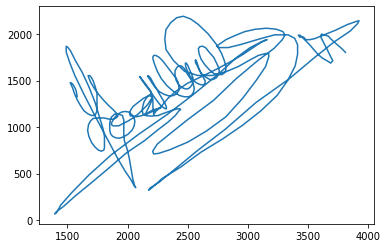

signature n° 0


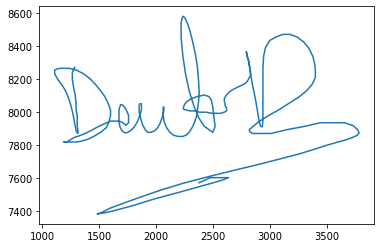

signature n° 1


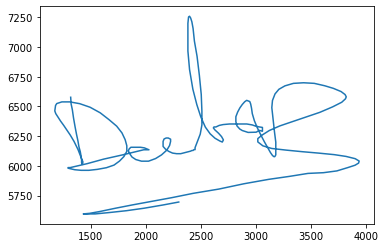

signature n° 2


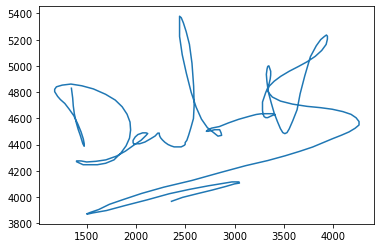

signature n° 3


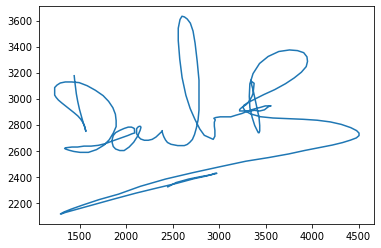

signature n° 4


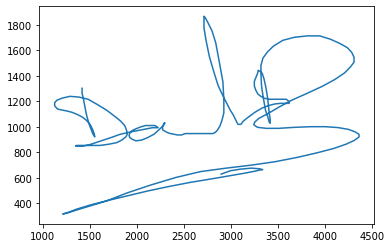

In [108]:
#4G

indiv_centers=[]
for i in range(len(complexite4G_mean)) : 
  c=complexite4G_mean[i]
  if ((c==center_clusters4G[0] or c==center_clusters4G[1] or c==center_clusters4G[2]) and len(indiv_centers)<3) :
    indiv_centers.append(i)

for indiv in indiv_centers :
  for i in range (5) :
    print("signature n°", i)
    fichier="/content/Base de données/"+ str(indiv) +"v"+ str(i) + ".txt"
    signature=pd.read_csv(fichier, header=None, sep=' ', names=["x", "y", "P", "Az", "Al"])
    plt.plot(signature.x, signature.y)
    plt.show()